In [156]:
import numpy as  np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [157]:
df = pd.read_csv("iris_short.csv")
df.head()

,Unnamed: 0,sepal length (cm),sepal width (cm),target
0,50,7.0,3.2,1
1,51,6.4,3.2,1
2,52,6.9,3.1,1
3,53,5.5,2.3,1
4,54,6.5,2.8,1


In [158]:
df = df.drop('Unnamed: 0',axis=1)

In [159]:
df

,sepal length (cm),sepal width (cm),target
0,7.0,3.2,1
1,6.4,3.2,1
2,6.9,3.1,1
3,5.5,2.3,1
4,6.5,2.8,1
...,...,...,...
95,6.7,3.0,2
96,6.3,2.5,2
97,6.5,3.0,2
98,6.2,3.4,2


In [160]:
df=df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [161]:
df_train

,sepal length (cm),sepal width (cm),target
61,6.4,2.7,2
65,6.4,3.2,2
75,7.2,3.2,2
5,5.7,2.8,1
28,6.0,2.9,1
44,5.6,2.7,1
39,5.5,2.5,1
53,6.3,2.9,2
66,6.5,3.0,2
9,5.2,2.7,1


In [162]:
df_val

,sepal length (cm),sepal width (cm),target
55,7.6,3.0,2
92,5.8,2.7,2
95,6.7,3.0,2
77,6.1,3.0,2
16,5.6,3.0,1


In [163]:
df_test

,sepal length (cm),sepal width (cm),target
37,6.3,2.3,1
60,6.5,3.2,2
1,6.4,3.2,1
11,5.9,3.0,1
29,5.7,2.6,1


In [164]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [165]:
X_test

array([[7.6, 3. ],
       [5.8, 2.7],
       [6.7, 3. ],
       [6.1, 3. ],
       [5.6, 3. ]])

In [166]:
y_test

array([2, 2, 2, 2, 1], dtype=int64)

## Case-1 Bagging

In [167]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf,legend=2)
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

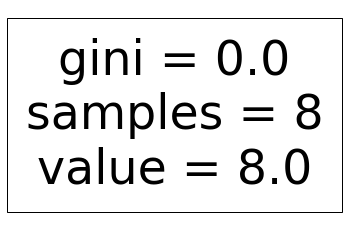

0.8


C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


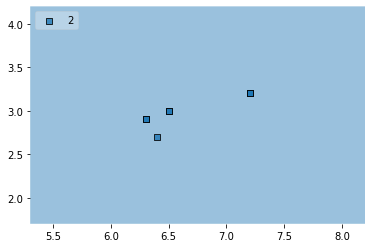

In [168]:
df_bag = df_train.sample(8,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag 

dt_bag1=DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

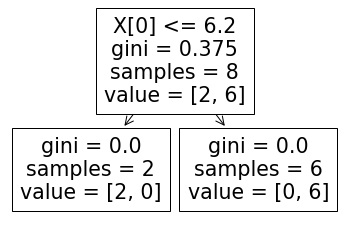

0.6


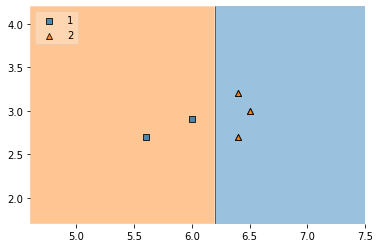

In [169]:
df_bag = df_train.sample(8,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag 

dt_bag3=DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [170]:
df_test

,sepal length (cm),sepal width (cm),target
37,6.3,2.3,1
60,6.5,3.2,2
1,6.4,3.2,1
11,5.9,3.0,1
29,5.7,2.6,1


In [172]:
print("Predictor 1",dt_bag1.predict(np.array([5.9,3.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([5.9,3.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([5.9,3.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [1]


## Types of Bagging
- pasting - row sampling but without replacement 
- random subspaces - column sampling with or without sampling 
- random patches - column sapling or row sampling both 

**Pasting**

In [173]:
df_train

,sepal length (cm),sepal width (cm),target
61,6.4,2.7,2
65,6.4,3.2,2
75,7.2,3.2,2
5,5.7,2.8,1
28,6.0,2.9,1
44,5.6,2.7,1
39,5.5,2.5,1
53,6.3,2.9,2
66,6.5,3.0,2
9,5.2,2.7,1


In [181]:
df_train.sample(8)  # without replacement

,sepal length (cm),sepal width (cm),target
53,6.3,2.9,2
61,6.4,2.7,2
28,6.0,2.9,1
44,5.6,2.7,1
9,5.2,2.7,1
65,6.4,3.2,2
75,7.2,3.2,2
5,5.7,2.8,1


**Random Subspaces**

In [207]:
df_train.sample(2,axis=1,replace=True)

,sepal length (cm),target
61,6.4,2
65,6.4,2
75,7.2,2
5,5.7,1
28,6.0,1
44,5.6,1
39,5.5,1
53,6.3,2
66,6.5,2
9,5.2,1


**Random Patches**

In [227]:
df_train.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal length (cm),sepal width (cm)
66,6.5,3.0
66,6.5,3.0
28,6.0,2.9
75,7.2,3.2
39,5.5,2.5
5,5.7,2.8
39,5.5,2.5
28,6.0,2.9


## Bagging - Scikit-Learn Implementation

In [288]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [289]:
X,y = make_classification(n_samples=10000, n_features=10,n_informative=3)

In [290]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [291]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Decision Tree accuracy",accuracy_score(y_test,y_pred))

Decision Tree accuracy 0.8995


In [292]:
x=cross_val_score(dt,X,y,cv=10,scoring='accuracy')
print('Accuracy',np.round(np.mean(x),2))

Accuracy 0.89


## Bagging - Decision Tree

In [245]:
vc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                      n_estimators=500,
                      max_samples=0.5,
                      bootstrap=True,
                      random_state=42,
                    bootstrap_features=True
                      )

In [246]:
vc.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                  bootstrap_features=True, max_samples=0.5, n_estimators=500,
                  random_state=42)

In [247]:
y_pred=vc.predict(X_test)
accuracy_score(y_test,y_pred)

0.887

## Bagging - SVM

In [252]:
bag_svm = BaggingClassifier(base_estimator=SVC(),n_estimators=100,max_samples=0.25,bootstrap=True,random_state=21)

In [253]:
bag_svm.fit(X_train,y_train)
y_pred=bag_svm.predict(X_test)
accuracy_score(y_test,y_pred)

0.847

## Types of Bagging 
### Pasting

In [263]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.25,
    bootstrap=False,
    random_state=42,
    verbose = 1
    )

bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Pasting classifier",accuracy_score(y_test,y_pred))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Pasting classifier 0.8835


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


### Random Subspaces

In [257]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=False,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
    
)


bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Subspaces classifier",accuracy_score(y_test,y_pred))
  

Random Subspaces classifier 0.8785


In [264]:
bag.estimators_features_[0]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Random Patches

In [265]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
)

bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Patches classifier",accuracy_score(y_test,y_pred))

Random Patches classifier 0.868


## OOB Score - Out Of Bag Sample

In [266]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

In [267]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, oob_score=True, random_state=42)

In [268]:
bag.oob_score_

0.893125

In [269]:
y_pred = bag.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.888


## Bagging Tips 

- Bagging generally gives better results than Pasting
- Good results come around the 25% to 50% row sampling mark
- Random patches and subspaces should be used while dealing with high dimensional data
- To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

## Applying GridSearch CV

In [293]:
from sklearn.model_selection import GridSearchCV

In [294]:
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
    }

In [295]:
search = GridSearchCV(BaggingClassifier(), parameters, cv=5)

In [ ]:
search.fit(X_train,y_train)

In [ ]:
search.best_params_
search.best_score_

In [ ]:
search.best_params_     

## Bagging Regression

In [274]:
from sklearn import datasets
boston = datasets.load_boston()
X_boston, Y_boston = boston.data, boston.target
print('Dataset features names : '+ str(boston.feature_names))
print('Dataset features size : '+ str(boston.data.shape))
print('Dataset target size : '+ str(boston.target.shape))

Dataset features names : ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Dataset features size : (506, 13)
Dataset target size : (506,)


In [275]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston , train_size=0.80, test_size=0.20, random_state=21)
print('Train/Test Sets Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sets Sizes :  (404, 13) (102, 13) (404,) (102,)


In [277]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [278]:
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [279]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [280]:
print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

R^2 score for LR 0.714936416139223
R^2 score for DT 0.8216955810259637
R^2 score for KNN 0.5315344717676693


## Bagging Regressor

In [281]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [282]:
Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.973
Test Coefficient of R^2 : 0.909


In [283]:
%%time

n_samples = boston.data.shape[0]
n_features = boston.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.980
Test R^2 Score : 0.898
Best R^2 Score Through Grid Search : 0.842
Best Parameters :  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
Wall time: 41.6 s
